In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
files = os.listdir('site_data_final/')

In [3]:
len(files)

432

In [4]:
df1 = pd.read_csv('site_data_final/'+files[0])
df1

,From Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Ozone,AQI,AQI_bucket
0,2015-01-01 01:00,598.51,935.18,69.03,35.69,104.72,NaN,0.58,NaN,108.02,NaN,NaN
1,2015-01-01 02:00,655.93,NaN,80.36,35.58,115.94,NaN,0.55,NaN,121.38,NaN,NaN
2,2015-01-01 03:00,657.68,NaN,94.69,35.45,130.13,NaN,0.51,NaN,NaN,NaN,NaN
3,2015-01-01 04:00,690.24,NaN,88.06,35.51,123.57,NaN,0.53,NaN,NaN,NaN,NaN
4,2015-01-01 05:00,625.27,976.99,70.91,35.82,106.74,NaN,0.58,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
72282,2023-03-31 19:00,23.20,46.72,1.61,25.90,26.83,NaN,1.84,NaN,17.50,96.0,Satisfactory
72283,2023-03-31 20:00,28.93,43.51,0.30,26.05,25.97,NaN,1.89,NaN,17.42,96.0,Satisfactory
72284,2023-03-31 21:00,29.48,61.83,0.29,25.89,25.72,NaN,1.79,NaN,17.45,96.0,Satisfactory
72285,2023-03-31 22:00,24.73,35.66,1.15,25.95,27.04,NaN,1.49,NaN,17.54,96.0,Satisfactory


In [5]:
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

def get_PM10_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 250:
        return "Moderate"
    elif x <= 350:
        return "Poor"
    elif x <= 430:
        return "Very Poor"
    elif x > 430:
        return "Severe"
    else:
        return np.NaN
    
def get_PM25_bucket(x):
    if x <= 30:
        return "Good"
    elif x <= 60:
        return "Satisfactory"
    elif x <= 90:
        return "Moderate"
    elif x <= 120:
        return "Poor"
    elif x <= 250:
        return "Very Poor"
    elif x > 250:
        return "Severe"
    else:
        return np.NaN
    
def get_NO2_bucket(x):
    if x <= 40:
        return "Good"
    elif x <= 80:
        return "Satisfactory"
    elif x <= 180:
        return "Moderate"
    elif x <= 280:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN
    
def get_O3_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 168:
        return "Moderate"
    elif x <= 208:
        return "Poor"
    elif x <= 748:
        return "Very Poor"
    elif x > 748:
        return "Severe"
    else:
        return np.NaN

def get_CO_bucket(x):
    if x <= 1:
        return "Good"
    elif x <= 2:
        return "Satisfactory"
    elif x <= 10:
        return "Moderate"
    elif x <= 17:
        return "Poor"
    elif x <= 34:
        return "Very Poor"
    elif x > 34:
        return "Severe"
    else:
        return np.NaN

    
def get_SO2_bucket(x):
    if x <= 40:
        return "Good"
    elif x <= 80:
        return "Satisfactory"
    elif x <= 380:
        return "Moderate"
    elif x <= 800:
        return "Poor"
    elif x <= 1600:
        return "Very Poor"
    elif x > 1600:
        return "Severe"
    else:
        return np.NaN

    
def get_NH3_bucket(x):
    if x <= 200:
        return "Good"
    elif x <= 400:
        return "Satisfactory"
    elif x <= 800:
        return "Moderate"
    elif x <= 1200:
        return "Poor"
    elif x <= 1800:
        return "Very Poor"
    elif x > 1800:
        return "Severe"
    else:
        return np.NaN


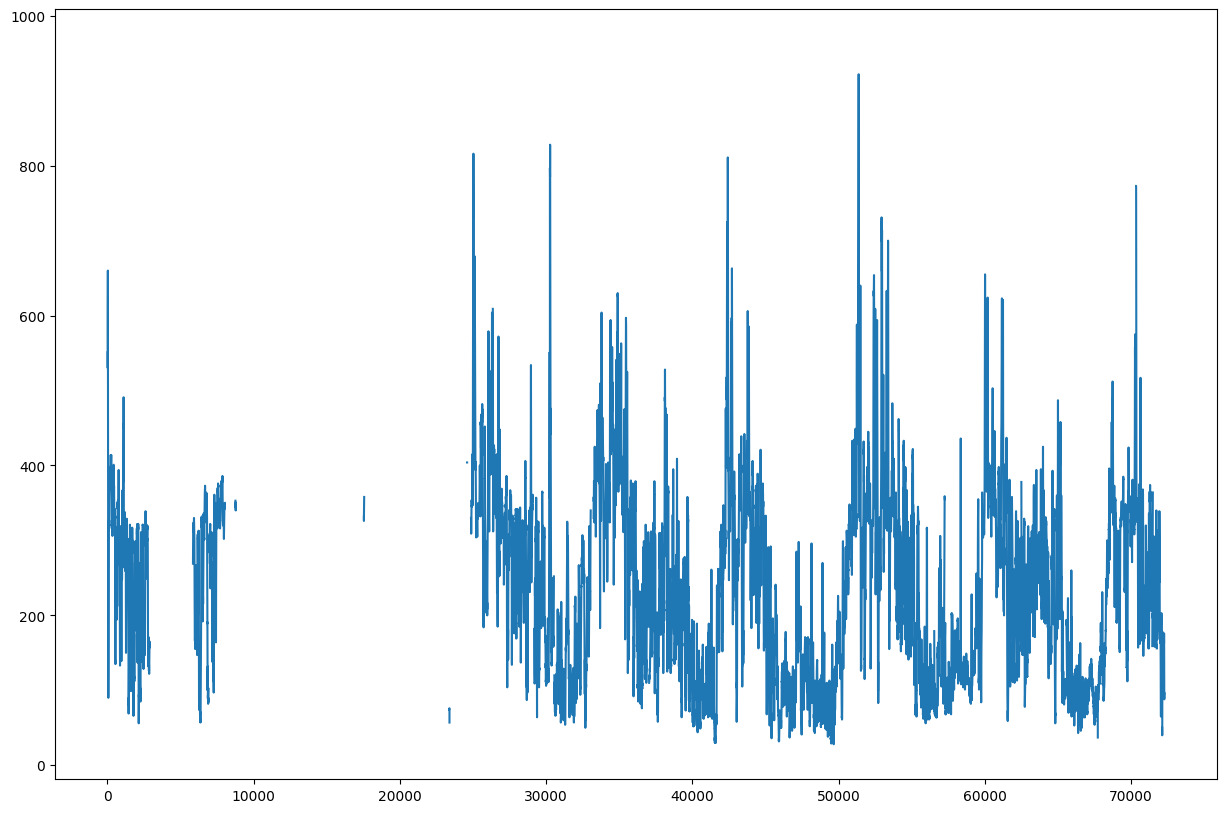

In [27]:
import matplotlib.pyplot as plt
df = pd.read_csv('site_data_final/'+files[0])
fig = plt.figure(figsize = (15,10))
plt.plot(df['AQI'])
plt.show()

In [8]:
for file in files[0:1]:
    df = pd.read_csv('site_data_final/'+file, usecols = ['From Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'Ozone', 'AQI'])
    df = df.iloc[df['AQI'].first_valid_index():]
    df['From Date'] = pd.to_datetime(df['From Date'])

    # Get index of first row where time component is 00:00
    first_idx = (df['From Date'].dt.time == pd.to_datetime('00:00').time()).idxmax()
    df['From Date'] = df['From Date'].dt.strftime('%Y-%m-%d %H:%M')
    df = df.loc[first_idx:]
    df.interpolate(method='spline', order=5, inplace=True)
    df["AQI_bucket"] = df["AQI"].apply(lambda x: get_AQI_bucket(x))
    df.to_csv('site_data_interpolate/'+file, index=False)

KeyboardInterrupt: 

In [28]:
df["AQI"] = df["AQI"].interpolate(method='spline', order=1)

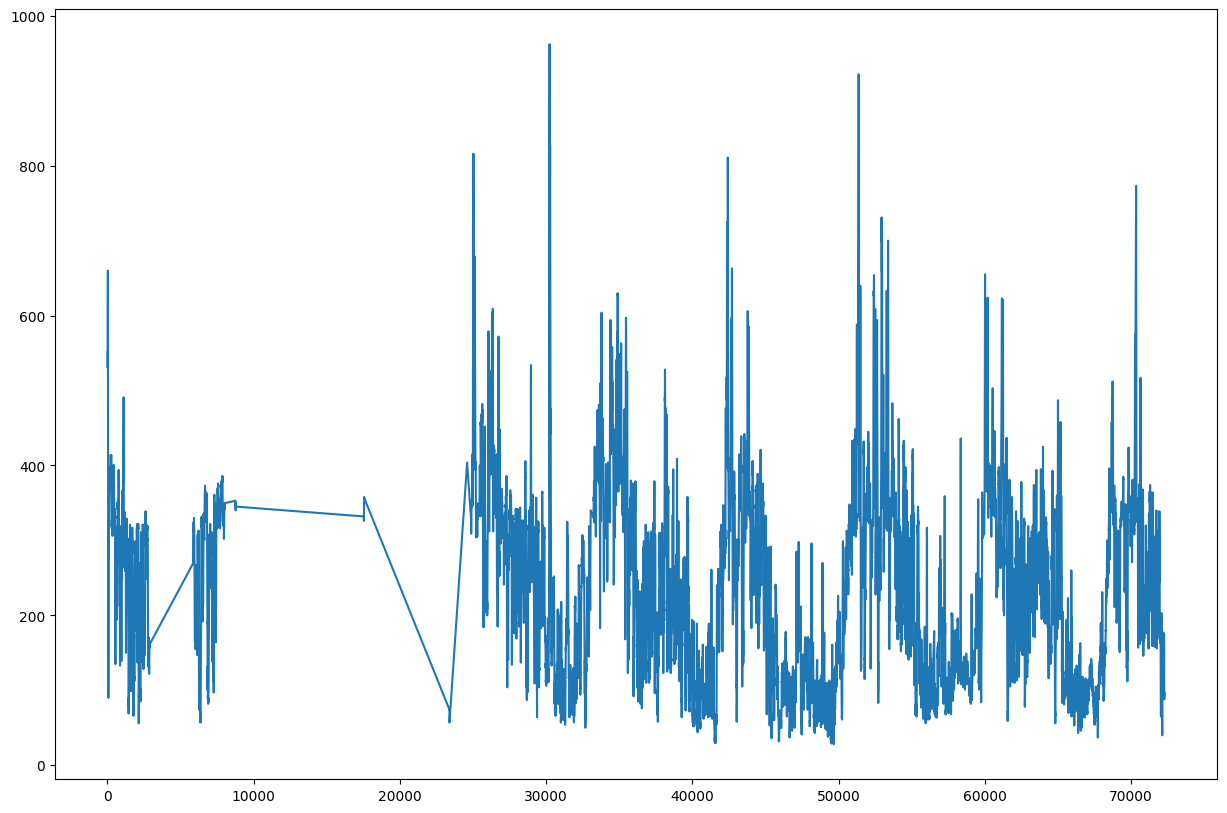

In [29]:
fig = plt.figure(figsize = (15,10))
plt.plot(df['AQI'])
plt.show()